<a href="https://colab.research.google.com/github/joaovictorfonseca/data_science/blob/master/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Science na Prática 2.0- Projeto 03**
*by [João Victor Fonseca](www.linkedin.com/in/joao-victor-silva-da-fonseca)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Os dados a serem utilizados nesse notebook foram adquiridos no [Our World on Data]('https://covid.ourworldindata.org/') disponibilizados como open acess e atualizados regurlamente utilizando fontes de renome como a organização mundial da saúde e o centro europeu de controle e prevenção de doenças. Por se tratar de um dataset complexo com múltiplas entradas e colunas, esperamos não usá-lo completamente e sim, focar em alguns aspectos considerados mais relevantes.


Como o CoViD-19 é uma doença recente e surpreendeu negativamente o mundo em um piscar de olhos, houve dificuldade em muitos locais para a obtenção de dados corretos, seja por subnotificação ou até mesmo por dados em conflito como em casos em que o governo federal cedeu, para um estado, um número diferente do entregue por este mesmo estado.


### Dicionário de Variáveis
* *A segir, temos as colunas de nosso dataset e o que cada uma representa:*
    * *`iso_code`* : Sigla internacional de cada País
    * *`continent`* : Continente
    * *`location`* : Localidade
    * *`date`* : Data da observação
    * *`total_cases`* : Número acumulado de casos de CoViD-19
    * *`new_cases`* : Novos casos confirmados na data
    * *`total_deaths`* : Número acumulado de mortes por CoViD-19
    * *`new_deaths`* : Novas mortes confirmadas na data
    * *`total_cases_per_million`* : Número acumulado de casos a cada 1 milhão de habitantes
    * *`new_cases_per_million`* : Novos casos a cada 1 milhão de habitantes
    * *`total_deaths_per_million`* : Número acumulado de mortes a cada 1 milhão de habitantes
    * *`new_deaths_per_million`* : Novas mortes confirmadas a cada 1 milhão de habitantes
    * *`total_tests`* : Quantidade total de testes
    * *`new_tests`* : Novos testes
    * *`new_tests_smoothed`* : Novos testes para países que não disponibilizam informações diárias
    * *`total_tests_per_thousand`* : Total de testes a cada mil habitantes
    * *`new_tests_per_thousand`* : Novos testes a cada mil habitantes
    * *`tests_units`* : Tipo de teste usado
    * *`stringency_index`* : Métrica para o quão severo foram as medidas  governamentais frente a pandemia (número entre 0 e 100)
    * *`population`* : Número de habitantes
    * *`population_density`* : Densidade populacional
    * *`median_age`* : Idade mediana da população
    * *`aged_65_older`* : Porcentagem da população acima de 65 anos
    * *`aged_70_older`* : Porcentagem da população acima de 70 anos
    * *`gdp_per_capita`* : Indicador de poder de compra por pessoa
    * *`extreme_poverty`* : Porcentagem da população que passa por pobreza extrema
    * *`cvd_death_rate`* : Taxa de mortalidade de doenças cardiovasculares em 2017
    * *`diabetes_prevalence`* : Porcentagem da população entre 20 e 79 anos que possuem diabetes (dados de 2017)
    * *`female_smokers`* : Porcentagem de mulheres fumantes
    * *`male_smokers`* : Porcentagem de homens fumantes
    * *`handwashing_facilities`* : Porcentagem da população com acesso a higiene básica
    * *`hospital_beds_per_thousand`* : Número de leitos hospitalares para cada mil habitantes
    * *`life_expectancy`* : Expectativa de vida (dados de 2019)


### Importando os dados

* Usaremos o arquivo csv disponível no [github da Our World on Data]('https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv') que foi atualizado no dia 03 de Julho de 2020.
    
* Abaixo importaremos algumas bibliotecas fundamentais para a realização do projeto.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# importando o dataset para um dataframe
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')


## Análise Exploratória dos Dados

*Para uma análise inicial iremos verificar alguns aspectos do nosso dataframe que podem dificultar ou até mesmo contaminar resultados com a falta de valores informados. Após a verificação podemos começar um trabalho mais visual utilizando diversos gráficos para facilitar o entendimento e extrair relações entre índices*





Primeiramente, vamos observar as cinco primeiras entradas e o formato do nosso banco de dados:

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


Após este pequeno passo já podemos perceber que os dados começam em 31 de dezembro de 2019 e até essa data só haviam sido registrados casos na China, assim esperamos que tenha um número considerável de linhas com número de casos igual a zero até a época que começou a dispersão do vírus mundo afora.

In [ ]:
print("Linhas:{}".format(df.shape[0]))
print("Colunas:{}".format(df.shape[1]))

Linhas:28243
Colunas:34


Temos que possui 34 colunas, as quais foram devidamente explicitadas no dicionário de variáveis e próximo de 28 mil entradas diferentes.

Obtendo os nomes de cada coluna e em seguida vamos ver o `dtype` de cada uma:

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [ ]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Pelo tipo de cada coluna podemos ver que a maior parte dos valores são numéricos e do tipo `float64` . 

Além disso podemos notar algo problemático , para quando formos analisar os dados em relação ao tempo, a coluna `date` está como objeto e para trabalhar melhor com ela temos que transformá-la no padrão de datas do python que é o `datetime64`.

In [ ]:
df.date = pd.to_datetime(df.date,format='%Y-%m-%d')

Agora iremos verificar a quantidade de dados não informados e sua porcentagem em relação ao total de entradas.

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values()

location                           0.000000
date                               0.000000
iso_code                           0.002266
population                         0.002266
total_cases                        0.007931
new_cases                          0.007931
total_deaths                       0.007931
new_deaths                         0.007931
continent                          0.008923
total_cases_per_million            0.010197
new_cases_per_million              0.010197
total_deaths_per_million           0.010197
new_deaths_per_million             0.010197
life_expectancy                    0.013950
population_density                 0.043975
diabetes_prevalence                0.067380
cvd_death_rate                     0.096874
median_age                         0.097936
aged_70_older                      0.102574
gdp_per_capita                     0.108310
aged_65_older                      0.110789
hospital_beds_per_thousand         0.175654
stringency_index                

Algumas colunas tem 0,02% de informação faltando enquanto outras chegam a ter 72% de valores não informados. Em geral as colunas mais problemáticas são relacionadas às quantidades de testes, tendo isso em vista, vamos procurar não trabalhar com os dados acerca dos testes neste notebook.

E muitas colunas das quais podemos tirar conclusões interessantes possuem um percentual baixo de desinformação.

## Visualização de dados

Neste momento, iremos focar na visualização de diferentes aspectos consequentes da doença.

Começaremos com os dados relacionados ao número de mortes por CoViD-19.

Primeiramente, vejamos os 6 países com maior número de mortes pela doença:

In [ ]:
df.loc[df.date == '2020-07-03',['location','total_deaths']].sort_values(by="total_deaths", ascending=False).head()

,location,total_deaths
28176,World,521115.0
26873,United States,128740.0
3822,Brazil,61884.0
26685,United Kingdom,43995.0
13168,Italy,34818.0


No dataset adquirido há uma uma linha com a localização 'World' que nada mais é que o total mundial na data reportada, como estamos analisando os países, linhas com essa localização não serão usadas por enquanto.

In [ ]:
df.loc[df.date == '2020-07-03',['location','total_deaths']].sort_values(by="total_deaths", ascending=False).head(7)[1:7]

,location,total_deaths
26873,United States,128740.0
3822,Brazil,61884.0
26685,United Kingdom,43995.0
13168,Italy,34818.0
9231,France,29875.0
16824,Mexico,29189.0


Os Estados Unidos possuem mais que o dobro do número de mortes do segundo país com mais fatalidades por CoViD , no caso o Brasil. Vamos criar um gráfico de barras para esses países para uma comparação mais visual.

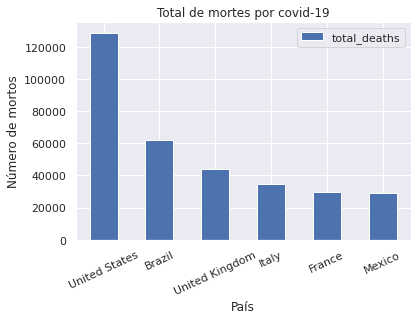

In [ ]:
sns.set()
fig , ax = plt.subplots()
df.loc[df.date=='2020-07-03'].sort_values(by='total_deaths',ascending=False)[1:7].plot(x='location',y='total_deaths',ax=ax,kind='bar')
ax.set_title('Total de mortes por covid-19')
ax.set_xlabel('País')
ax.set_ylabel('Número de mortos')
plt.xticks(rotation=25)
plt.show()

Como os EUA se mostrou muito pior em relação aos outros 5 países listados, vamos analisar como o número total de mortes deste está em relação ao número total de mortos ao redor do mundo.

In [ ]:
df.loc[df.date == '2020-07-03'][['location','total_deaths']].sort_values(by='total_deaths',ascending=False)[0:2]

,location,total_deaths
28176,World,521115.0
26873,United States,128740.0


Utilizando os índices acima, temos:

In [ ]:
(df.iloc[26873]['total_deaths'] / df.iloc[28176]['total_deaths']).round(3)

0.247

In [ ]:
(df.iloc[26873]['population'] / df.iloc[28176]['population']).round(3)

0.042

Ou seja, o país dos ianques teve quase 25 por cento das mortes globais pelo vírus mesmo que a razão entre a população americana e a global seja de apenas 4,2 por cento. Por mais que o dado seja absurdo, existem diversas teorias acerca desse acontecimento, como a tomada de decisões questionáveis para lidar com a pandemia por parte do governo federal americano e a aplicação tardia do isolamento social como meio de prevenção da disseminação da doença no país.

Voltando para os dados acerca de casos confirmados:

In [ ]:
df.loc[df.date == '2020-07-03',['location','total_cases']].sort_values(by="total_cases", ascending=False).head(7)[1:7]

,location,total_cases
26873,United States,2739879.0
3822,Brazil,1496858.0
21313,Russia,661165.0
11944,India,625544.0
20221,Peru,292004.0
5409,Chile,284541.0


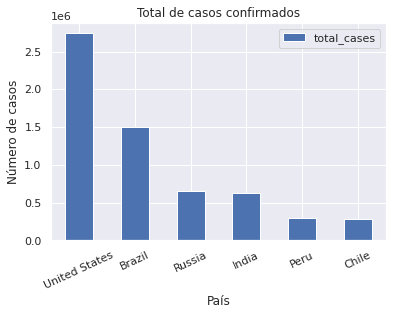

In [ ]:
fig , ax = plt.subplots()
df.loc[df.date=='2020-07-03'].sort_values(by='total_cases',ascending=False)[1:7].plot(x='location',y='total_cases',ax=ax,kind='bar')
ax.set_title('Total de casos confirmados')
ax.set_xlabel('País')
ax.set_ylabel('Número de casos')
plt.xticks(rotation=25)
plt.show()

Podemos ver que Rússia e Índia que não figuram entre os primeiros no número total de mortos aparecem no número total de casos confirmados . Uma explicação plausível para isto é o problema da subnotificação , em que no Reino Unido por exemplo, temos um número de casos confirmados informado menor do que de fato é, segundo diversas estudos e reportagens como esta disponibilizada pela [CNN]('https://edition.cnn.com/2020/04/07/uk/coronavirus-uk-deaths-intl-gbr/index.html') datado de Abril que demonstra suspeitas sobre o governo do Reino Unido estar reportando números menores para favorecer interesses próprios.

Vamos adicionar uma nova coluna no nosso dataset que será a taxa de mortalidade da doença para determinado data e localização, calculada pela divisão das mortes acumuladas até a data pelo número total de casos.

Ou seja:

```
['mortality_rate'] = ['total_deaths'] / ['total_cases']
```
 Feito isto, vamos ver como os países com maior número de óbitos causados pelo vírus se comportam em relação a taxa de mortalidade mundial do mesmo.


In [ ]:
df['mortality_rate'] = df['total_deaths'] / df['total_cases']
df.loc[df.date == '2020-07-03'][['location','total_cases','total_deaths','mortality_rate']].sort_values(by='total_deaths',ascending=False).head()

,location,total_cases,total_deaths,mortality_rate
28176,World,10844591.0,521115.0,0.048053
26873,United States,2739879.0,128740.0,0.046987
3822,Brazil,1496858.0,61884.0,0.041343
26685,United Kingdom,283757.0,43995.0,0.155045
13168,Italy,240961.0,34818.0,0.144496


In [ ]:
df.loc[df.date == '2020-07-03'][['location','total_cases','total_deaths','mortality_rate']].sort_values(by='total_deaths',ascending=False).head()

,location,total_cases,total_deaths,mortality_rate
28176,World,10844591.0,521115.0,0.048053
26873,United States,2739879.0,128740.0,0.046987
3822,Brazil,1496858.0,61884.0,0.041343
26685,United Kingdom,283757.0,43995.0,0.155045
13168,Italy,240961.0,34818.0,0.144496


Pela taxa podemos ver no que implica a falta de confiança nos dados passados, o Reino Unido acaba por apresentar taxa de mortalidade maior que inúmeros países subdesenvolvidos e chega a ter a taxa maior que 98% de todos países listados.

Tendo as informações extraídas em mente, agora iremos ver a evolução da doença no mundo inteiro como uma série temporal, deste modo precisamos criar esta para analisá-la.

In [ ]:
world = df.loc[df.location == 'World'][['total_cases','total_deaths','date']].copy()
world.set_index('date',drop=True)

,total_cases,total_deaths
date,,
2019-12-31,27.0,0.0
2020-01-01,27.0,0.0
2020-01-02,27.0,0.0
2020-01-03,44.0,0.0
2020-01-04,44.0,0.0
...,...,...
2020-07-01,10465987.0,511041.0
2020-07-02,10666202.0,515972.0
2020-07-03,10844591.0,521115.0


Plotando gráficos de linhas para ver o crescimento da doença desde a data inicial até o dia 03 de Julho onde nossos dados foram coletado:

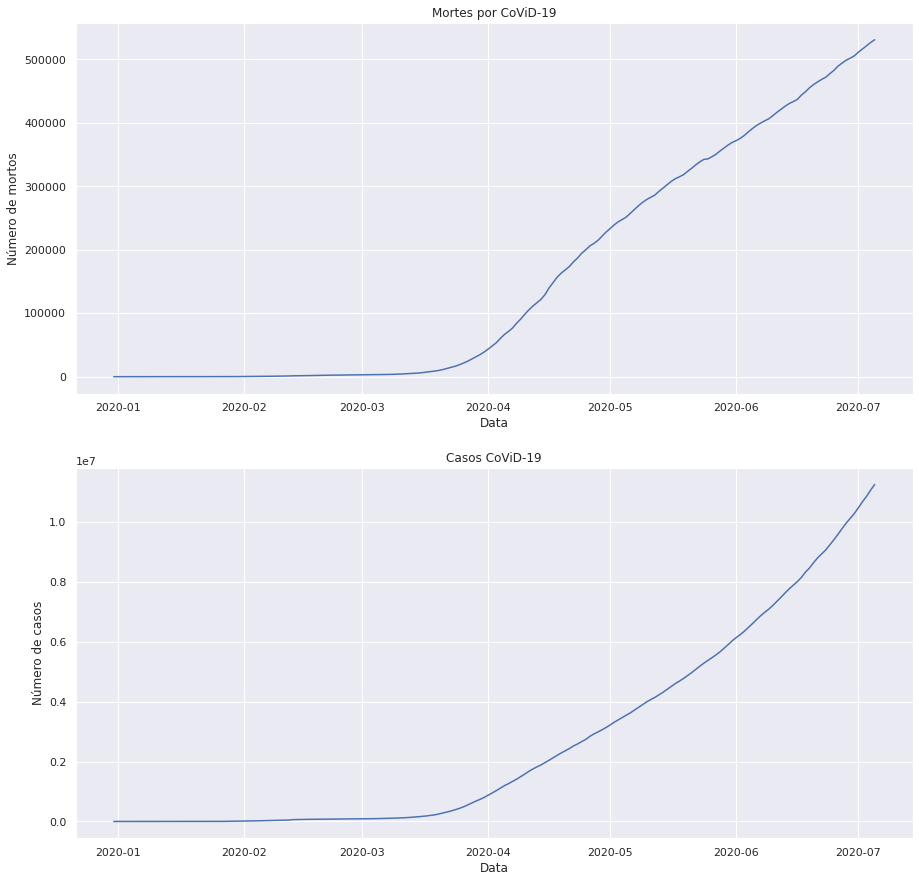

In [ ]:
fig , ax = plt.subplots(nrows=2,ncols=1,figsize=(15,15))
ax[0].plot(world.date,world.total_deaths)
ax[1].plot(world.date,world.total_cases)
ax[0].set_title('Mortes por CoViD-19')
ax[1].set_title('Casos CoViD-19')
ax[0].set_xlabel('Data')
ax[1].set_xlabel('Data')
ax[0].set_ylabel('Número de mortos')
ax[1].set_ylabel('Número de casos')
plt.show()

Graficamente, podemos observar que a doença atingiu o marco de 100 mil óbitos na primeira semana de Abril e apenas um mês após já havia triplicado esse valor o que ressalta o poder de disseminação do vírus mesmo com a quarentena que já estava implementada em inúmeras localidades.

E o total de casos segue o mesmo modelo, que se assemelha uma exponencial, que em menos de 1 mês o número de resultados positivos para o teste foi de 5 milhões para mais de 10 milhões.

### Análise Exploratória para o Brasil


Agora iremos focar nossa análise apenas para o Brasil e verificar como foi a evolução da doença em alguns aspectos.

In [ ]:
#Criando um novo dataframe que constam apenas os dados do país
brasil = df.loc[df.location == 'Brazil'][['total_cases','total_deaths','date']].copy()
brasil.set_index('date',inplace=True,drop=True)

Verifiquemos quando ocorreu o primeiro óbito por covid notificado em nosso país e o primeiro caso confirmado do vírus.

In [ ]:
brasil.loc[brasil['total_deaths']>0].head(3)

,total_cases,total_deaths
date,,
2020-03-18,291.0,1.0
2020-03-19,428.0,4.0
2020-03-20,621.0,6.0


In [ ]:
brasil.loc[brasil['total_cases']>0].head(3)

,total_cases,total_deaths
date,,
2020-02-26,1.0,0.0
2020-02-27,1.0,0.0
2020-02-28,1.0,0.0


Temos que no dia 26 de Fevereiro foi notificado o primeiro caso da doença em terras brasileiras e no dia 18 de Março ocorreu o primeiro óbito causado pelo vírus e nesse mesmo dia já existiam 291 casos confirmados no país.

Vamos checar como o vírus que tirou a vida de mais de 60 mil brasileiros se dispersou desde o primeiro caso até o começo de Julho do mesmo ano.

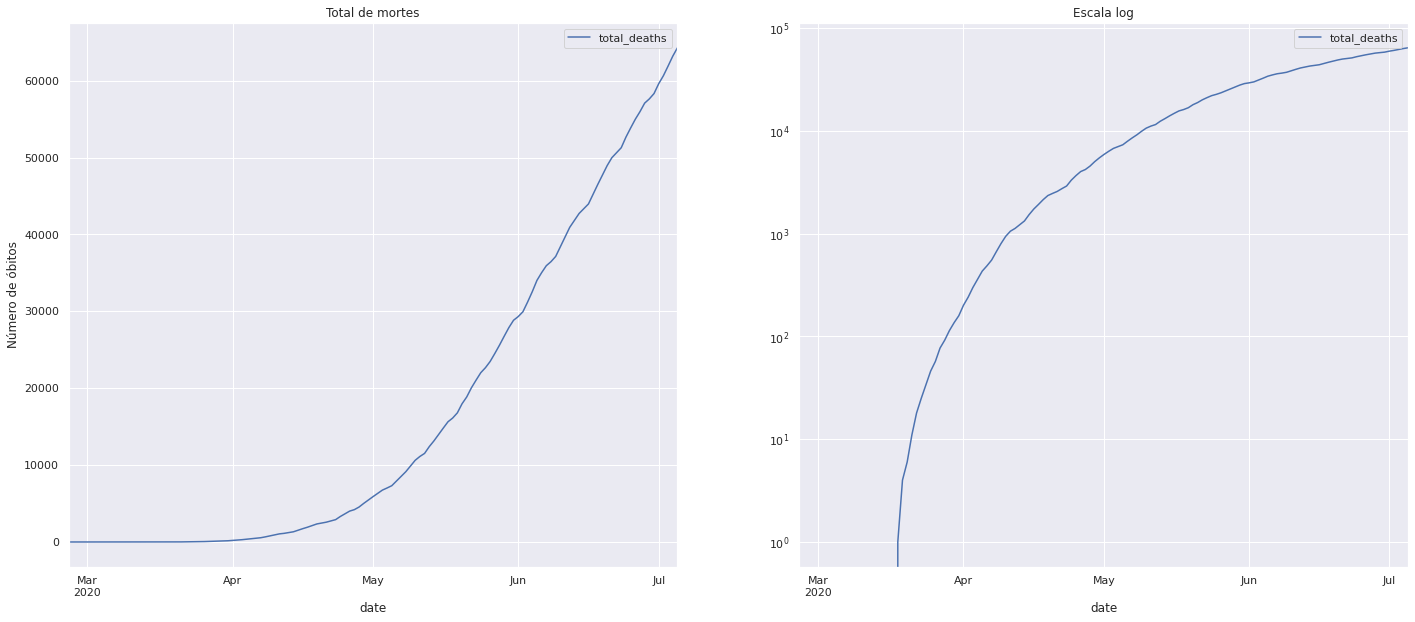

In [ ]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(24,10))
brasil['2020-02-26':].plot(ax=ax[0],y='total_deaths',title= 'Total de mortes')
brasil['2020-02-26':].plot(ax=ax[1],y='total_deaths',loglog=True,title='Escala log')
ax[0].set_ylabel('Número de óbitos')
plt.show()

Pelo gráfico em escala logarítimica vemos que a curva de mortes só começa a se achatar perto da marca de 1 milhão de óbitos porém não podemos concluir se essa curva de fato se aproximará de algo linear, ou seja, que o número de mortos não aumentará de maneira significante .


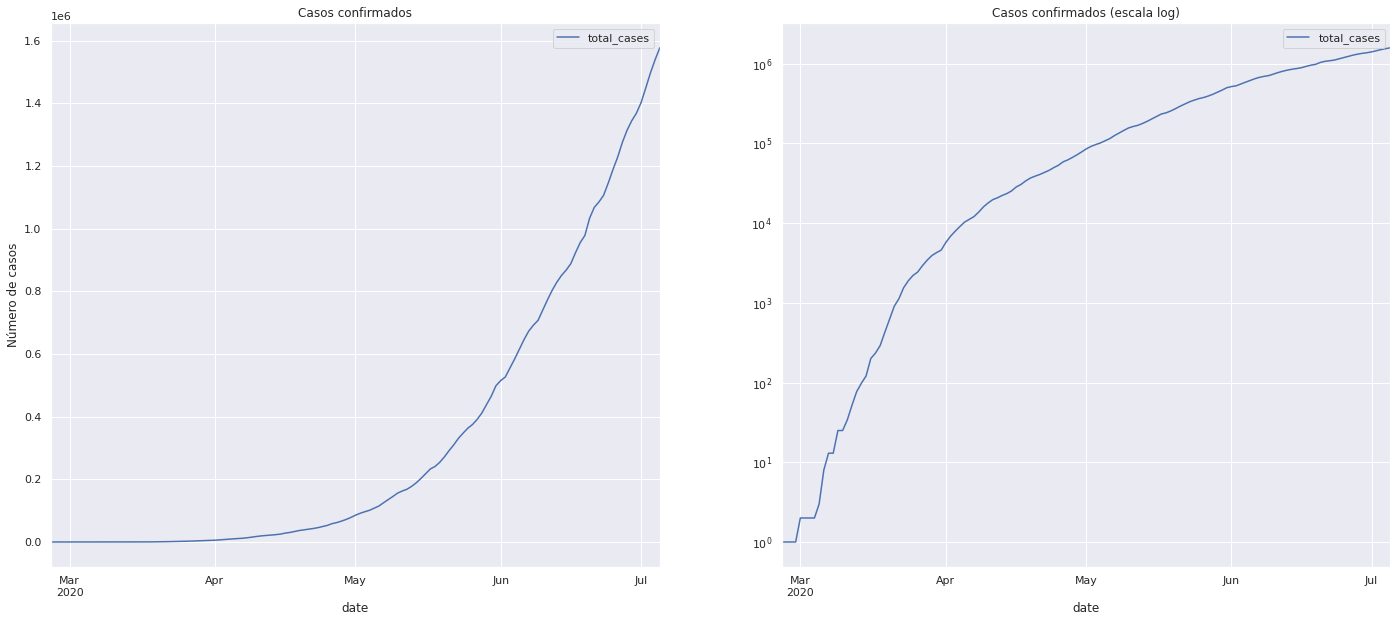

In [ ]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(24,10))
brasil['2020-02-26':].plot(ax=ax[0],y='total_cases',title= 'Casos confirmados')
brasil['2020-02-26':].plot(ax=ax[1],y='total_cases',loglog=True,title='Casos confirmados (escala log)')
ax[0].set_ylabel('Número de casos')
plt.show()

## Conclusão

Inicialmente vale lembrar que os dados utilizados no projeto foram coletados no dia 03/07/2020 e como são coletados diariamente na maior parte dos países , em um futuo próximo a publicação do notebook este eestará desatualizado de certa forma.

Conseguimos retirar informações intrínsecas do nosso banco de dados , algumas destas são:
* Por mais que a Rússia não figure entre os países com dezenas de milhares de mortes , esta ainda é o terceiro país com mais infectados com cerca de 600 mil casos positivos.
* Mesmo os Estados Unidos sendo, de forma isolada, o país mais afetado pelo CoViD-19 os EUA ainda possui uma taxa de mortalidade da doença menor que países como Itália e Reino Unido.
* O crescimento da doença ainda está gigantesco de forma que não podemos ter ideia de quando se estabilizará.
* O Brasil está se aproximando da marca de 2 milhões de infectados e pelo gráfico de crescimento, é altamente provável que chegue a este.

Através de uma análise básica conseguimos extrair informações preciosas e que não são comumente transmitidas na mídia por mais que essa seja apenas uma análise exploratória inicial. Ainda existem inúmeras relações possíveis de serem exploradas neste dataset porém limitamo-nos a uma abordagem simples para conseguir um conhecimento geral da ação do vírus ao redor do mundo. 
